## Importing the Dataset
#### [data url](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

In [2]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning and Pre-processing

In [5]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/koirals1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
#creating corpus with stemming
ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
    #replacing all the punctuations with empty space
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    #converting all the characters to lowercase
    review = review.lower()
    #splitting the sentences (to have list of words)
    #review = nltk.word_tokenize(review) ->same as the code below (splitting into words)
    review = review.split()
    #list comprehension (stemming and stopwords)
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #joining all the reviews and appending it to list called corpus
    #review = ''.join(review) ->joins without space
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [16]:
#Creating the Bag of Wores model
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#taking only the most freqent columns, here lets take max_features to 2500
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(5572, 2500)

In [19]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
#converting the labels(categorical values) into dummy variables
y = pd.get_dummies(messages['label'])

#to avoid dummy variable trap
#we can just take 1 column as there are only 2 column and single column represents the data
#y = y.iloc[:,1].values
y = y.iloc[:,0].values

In [23]:
y[0:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=uint8)

## Model training and prediction

In [25]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
#training the model using Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [27]:
#predicting on the test set
y_pred = spam_detect_model.predict(X_test)

In [28]:
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

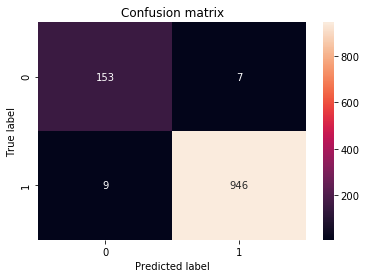

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [33]:
#accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9856502242152466


In [34]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.99      0.99      0.99       955

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

